# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [46]:
# your answer here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [8]:
# your answer here
employee = pd.read_csv("data/Employee.csv")
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
employee.groupby("Department").agg({"Salary":"mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# Method 2
# your answer here
employee.pivot_table(index="Department", values=["Salary"]) #, aggfunc="mean") - default behaviour anyway

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
# your answer here
employee.pivot_table(index=["Department", "Title"], values="Salary")

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [9]:
# your answer here
employee.pivot_table(index=["Department", "Title"], values=["Years", "Salary"])

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [10]:
# your answer here
employee.pivot_table(index=["Department", "Title"], values=["Salary", "Name"], aggfunc={"Salary":"mean", "Name":"count"})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [19]:
# your answer here
stats = employee.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=["median", "min", "max", "std"])
stats

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

For HR/VP, IT/VP and IT/associate, there is only one individual per department/title, so all the values are equal. Pandas returned a standard deviation of NaN because of the same reason. There are no other values to deviate from.

#### Based on your comments, fill the missing values with an appropriate value.

In [20]:
# your answer here
# in this case, 0 is an appropriate value to fill the NaNs
stats.fillna(0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [23]:
# your answer here
employee.pivot_table(index="Department", values=["Name", "Salary"], aggfunc={"Name":"count", "Salary":"sum"})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [24]:
# your answer here
employee.pivot_table(index=["Department", "Title"], values=["Years", "Salary"], aggfunc={"Years":"sum", "Salary":"mean"})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [34]:
# your answer here
def mean_lowsalaries(x):
    return np.mean(x[x < max(x)])

employee.pivot_table(index="Department", values=["Salary"], aggfunc=[mean_lowsalaries])

# not sure why the sales department is gone... probably because the only existing value is the max...

,mean_lowsalaries
,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [38]:
# your answer here
fitbit = pd.read_csv("data/Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [40]:
# your answer here
# looking at data types
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [42]:
# your answer here
# looking at descriptive stats
stts = fitbit.describe()
stts

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [48]:
# your answer here
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

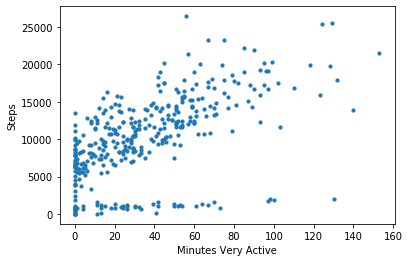

In [50]:
# your answer here
plt.scatter(x=fitbit["Minutes Very Active"], y=fitbit["Steps"], s=10)
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [58]:
"""
Correlation value is <0.7 so the relationship between the two is too weak to call a true correlation.
Nevertheless, there seems to be a relationship between the variables. If we exclude the cases where the number
of steps is lower than 2500, we should see a correlation value >0.7
Possibly the reason why there are cases where "Minutes Very Active" and "Steps" do not reflect the same tendency
is that there are multiple types of exercises that do not require walking/running.
"""

# Testing hypothesis:
test_ds = fitbit[fitbit["Steps"]>2500][["Steps", "Minutes Very Active"]]
test_ds["Minutes Very Active"].corr(test_ds["Steps"])

0.754426100391632

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [53]:
# your answer here
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

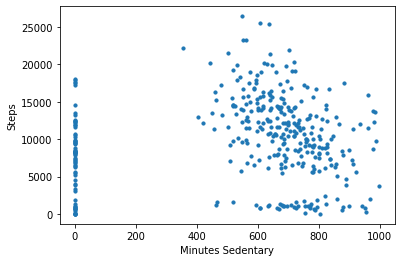

In [55]:
# your answer here
plt.scatter(x=fitbit["Minutes Sedentary"], y=fitbit["Steps"], s=10)
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [59]:
"""
Both the plot and the correlation value indicate that there is no linear relationship between the variables.
There is a concentration of points close to Minutes Sedentary=0 which corresponds to the minutes where there
was activity. This concentration is causing the correlation calue to take a positive value. If we were to exclude
these points from the analysis, the r-value would probably indicate a slight negative relation between the variables
(closer to 0 than -1) but, from what we can see of the scatter plot, probably not enough to form a correlation
either.
"""

# Testing hypothesis:
test_ds = fitbit[fitbit["Minutes Sedentary"]>20][["Steps", "Minutes Sedentary"]]
test_ds["Minutes Sedentary"].corr(test_ds["Steps"])

-0.3782654163999832

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [60]:
# your answer here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

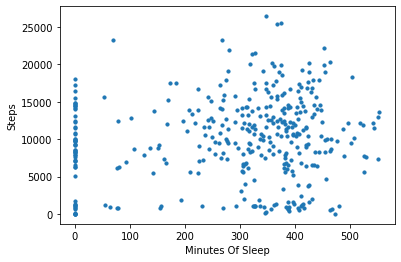

In [61]:
# your answer here
plt.scatter(x=fitbit["MinutesOfSleep"], y=fitbit["Steps"], s=10)
plt.xlabel("Minutes Of Sleep")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
Based on the correlation value (<0.7) and the shape of the scatter plot, 
there is no indication of a correlation. Like in the previous example, there is a concentration 
of points around 0 minutes of sleep, which might account for the r-value being as high as it is.
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [63]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [66]:
# your answer here
cor_fit["Steps"].sort_values(ascending=False)[1:]

Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

In [ ]:
# Based on these results, there are no highly correlated features with Steps.
# There are no values greater than 0.7

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [68]:
# your answer here
time_grades = pd.read_csv("data/Time_Grades.csv")
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bd6fcd0>,
      dtype=object)

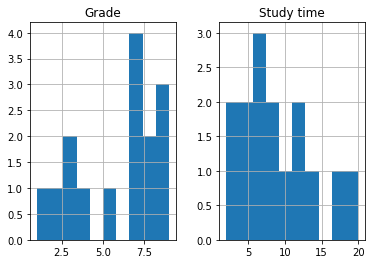

In [69]:
# your answer here
time_grades.hist()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [72]:
# your answer here
pcorr = time_grades["Grade"].corr(time_grades["Study time"]) # Pearson is the default method
scorr = time_grades["Grade"].corr(time_grades["Study time"], method="spearman")

print("Pearson:", pcorr, "; Spearman:", scorr)

# Yes, there appears to be a strong correlation between the two variables.

Pearson: 0.7980456073578858 ; Spearman: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

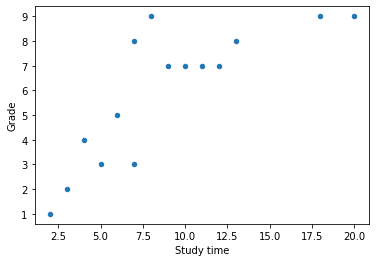

In [74]:
# your answer here
plt.scatter(x=time_grades["Study time"], y=time_grades["Grade"], s=20)
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()

In [ ]:
# The plot seems to confirm the results gotten from the calculation, even though there are not
# enough observations to form a definite conclusion. Nevertheless, looking at this graph shape,
# the points seem to align along a curve, which would indicate a non-linear positive correlation.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
"""
The Pearson correlation is best-suited to analyse linear correlations. The Spearman method is best-suited
to the study of non-linear monotone relations (relations where the variables keep a steady tendency to either
increase or decrease along a curve but not both).

Both methods give results that vary between -1 and 1, where -1 is a perfect negative correlation (when one 
variable increases, the other decreases), 1 a perfect positive correlation (when one increases/decreases, 
so does the other) and 0 indicates that there is no relation between the variables.

In the case of this dataset, both methods return a positive result regarding the existence of a correlation
between "Study time" and "Grade". Spearman's method returned a value closer to 1, which seems to confirm
the conclusion drawn through observation of the plot: that this is not a perfectly linear correlation.
"""